
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

In [0]:
## Created by Sreya Dhar
## Dated: 04/20/20
## SHALA2020/Assignment-2

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from math import pi
from sklearn.impute import SimpleImputer

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
import pandas as pd
import numpy as np
import csv
# Load the file as a dataframe 
movies_url = "https://campuspro-uploads.s3.us-west-2.amazonaws.com/7fd5e5e1-9016-431f-8fe7-22a61ac8b47f/55d83af7-0382-44bd-b3b5-374bcf2e8493/moviesData.csv"
df_url = "https://campuspro-uploads.s3.us-west-2.amazonaws.com/7fd5e5e1-9016-431f-8fe7-22a61ac8b47f/652e3e90-3378-494b-ac11-a7d65b73e5fb/train.csv"
movies = pd.read_csv(movies_url)
df= pd.read_csv(df_url)

In [6]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [7]:
# Print the first five rows of MonthlyRate
df.MonthlyRate.head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [8]:
# details of the column MonthlyRate like mean, maximum value, minimum value
print("Mean of column A is: {}".format(df['MonthlyRate'].mean()))
print("Mean of column B is: {}".format(df['MonthlyRate'].max()))
print("Mean of column C is: {}".format(df['MonthlyRate'].min()))

Mean of column A is: 14243.53112840467
Mean of column B is: 26999
Mean of column C is: 2094


In [9]:
# Find the details of MonthlyRate 
first = df["MonthlyRate"]
print(first)
df.MonthlyRate.describe()

0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1023    10494
1024    26703
1025    15211
1026    23343
1027     3708
Name: MonthlyRate, Length: 1028, dtype: int64


count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [10]:
# current size of df
df.shape

# Check for missing values 
df.isnull()

# Total missing values for each feature
df.isnull().sum()
total_missing_value= df.isnull().sum().sum()
print(df.shape, df.isnull(),df.isnull().sum(), total_missing_value)

(1028, 34)         Age  Attrition  ...  YearsWithCurrManager     ID
0     False      False  ...                 False  False
1     False      False  ...                 False  False
2     False      False  ...                 False  False
3     False      False  ...                 False  False
4     False      False  ...                 False  False
...     ...        ...  ...                   ...    ...
1023  False      False  ...                 False  False
1024  False      False  ...                 False  False
1025  False      False  ...                 False  False
1026  False      False  ...                 False  False
1027  False      False  ...                 False  False

[1028 rows x 34 columns] Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeN

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [11]:
# Add a column named MonthRateNew 
df['MonthRateNew']= (df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std()
print(df)

      Age  Attrition  ...    ID  MonthRateNew
0      41          1  ...     0      0.742749
1      49          0  ...     1      1.512813
2      37          1  ...     2     -1.680795
3      33          0  ...     3      1.264827
4      27          0  ...     4      0.338849
...   ...        ...  ...   ...           ...
1023   56          0  ...  1023     -0.531941
1024   47          0  ...  1024      1.767609
1025   24          0  ...  1025      0.137254
1026   32          0  ...  1026      1.290930
1027   34          0  ...  1027     -1.494663

[1028 rows x 35 columns]


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [12]:
# shape of the missing values
movies.shape
# Check for missing values 
movies.isnull()

# Total missing values for each feature
movies.isnull().sum()
movies.isnull().sum().sum()

# Drop the missing values 
movies_new=movies.dropna()
print(movies_new.shape, movies.shape)
# Replace the missing values for categorical variable
movies_obj = movies.select_dtypes(include=['object']).copy()
imputer = SimpleImputer(missing_values = np.nan,  strategy ="most_frequent") 
imputer = imputer.fit(movies_obj)
movies_obj_f= imputer.transform(movies_obj)
print("Imputed Data : \n", movies_obj_f)

# Replace the missing values for numerical variable
movies_num = movies.select_dtypes(exclude=['object']).copy()
imputer_num = SimpleImputer(missing_values = np.nan,  strategy ="mean") 
imputer_num = imputer.fit(movies_num)
movies_num_f= imputer.transform(movies_num)
print("Imputed Data : \n", movies_num_f)
print(movies_num_f.shape, movies_obj_f.shape)
movies_f=np.concatenate((movies_num_f, movies_obj_f), axis=1)
print("Final Imputed Movies: ", movies_f)

(572, 31) (600, 31)
Imputed Data : 
 [['Filly Brown' 'Feature Film' 'Drama' ... 'Lou Diamond Phillips'
  'Emilio Rivera' 'Joseph Julian Soria']
 ['The Dish' 'Feature Film' 'Drama' ... 'Patrick Warburton' 'Tom Long'
  'Genevieve Mooy']
 ['Waiting for Guffman' 'Feature Film' 'Comedy' ... 'Parker Posey'
  'Eugene Levy' 'Bob Balaban']
 ...
 ['Dance of the Dead' 'Feature Film' 'Action & Adventure' ...
  'Chandler Darby' 'Carissa Capobianco' 'Randy McDowell']
 ['Around the World in 80 Days' 'Feature Film' 'Action & Adventure' ...
  'Ewen Bremner' 'Robert Fyfe' 'Ian McNeice']
 ['LOL' 'Feature Film' 'Comedy' ... 'Ashley Greene' 'Douglas Booth'
  'Adam G. Sevani']]
Imputed Data : 
 [[1.0000e+00 8.0000e+01 2.0130e+03 ... 8.9900e+02 4.5000e+01 7.3000e+01]
 [2.0000e+00 1.0100e+02 2.0010e+03 ... 1.2285e+04 9.6000e+01 8.1000e+01]
 [3.0000e+00 8.4000e+01 1.9960e+03 ... 2.2381e+04 9.1000e+01 9.1000e+01]
 ...
 [5.9800e+02 8.7000e+01 2.0080e+03 ... 1.0087e+04 8.0000e+01 5.2000e+01]
 [5.9900e+02 1.2000e+

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

Text(0.5, 1.0, 'A scatter plot between Age and Attrition')

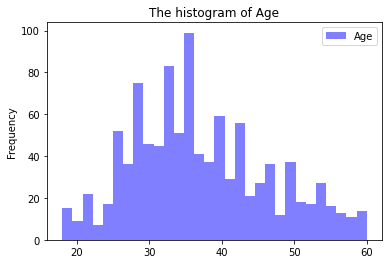

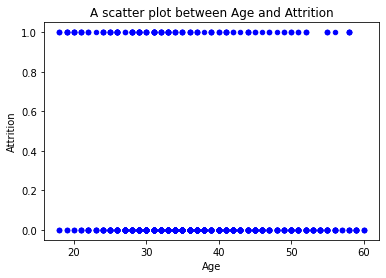

In [13]:
# Plot and modify the histogram of Age
age= pd.DataFrame(df['Age'])
age_hist = age.plot.hist(bins=30, facecolor='blue', alpha=0.5).set_title("The histogram of Age")

# Draw a scatter plot between Age and Attrition
df.plot(kind='scatter',x='Age',y='Attrition',color='blue').set_title("A scatter plot between Age and Attrition")

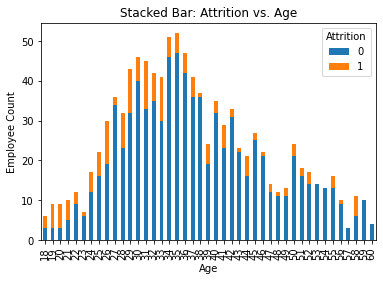

Employees=<50 years= 912.0
Employees>50 years= 116.0
Employees=<50 years left the company= 158.0
Employees>50 years left the company= 12.0
Percentage of Employees=<50 years left the company= 17.32456140350877
Percentage of Employees>50 years left the company= 10.344827586206897


In [16]:
df['Age'].value_counts()

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
age_count = (df.pivot_table(
        index='Attrition', columns='Age', values='EmployeeCount', aggfunc='sum'))
age_count.fillna(0)
age_count[:33]
s1=age_count.sum(axis=0)[:33]
s1.sum()
s2=age_count.sum(axis=1)
s2.sum()

# Draw a stacked bar chart between Attrition and Gender 
age_count_1 = (df.pivot_table(
        index='Age', columns='Attrition', values='EmployeeCount', aggfunc='sum'))
age_count_1.plot(kind='bar', stacked=True).set_title("Stacked Bar: Attrition vs. Age")
plt.ylabel('Employee Count')
plt.show()

# Find out whether people more than 50 years are more likely to leave the company. (Attrition = 1 means people have left the company).
print('Employees=<50 years=',s1.sum())
print('Employees>50 years=',s2.sum()-s1.sum())
age_count_1.fillna(0)
s3=age_count_1[:33]
s4= s3.sum(axis=0)[1]
print('Employees=<50 years left the company=',s4)
s5=age_count_1[34:]
s6= s5.sum(axis=0)[1]
print('Employees>50 years left the company=',s6)
print('Percentage of Employees=<50 years left the company=',s4*100/s1.sum())
print('Percentage of Employees>50 years left the company=',s6*100/(s2.sum()-s1.sum()))

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

Text(0.5, 1.0, 'Attrition Count plot')

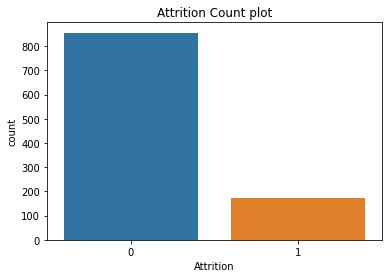

In [17]:
# Get a series of counts of values of Attrition
df['Attrition'].value_counts()

# Draw a countplot for Attrition 
sns.countplot(x='Attrition', data=df).set_title("Attrition Count plot")

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

In [18]:
# Draw a cross tab of Attrition and BusinessTravel 
# You may use crosstab of pandas for this 
pd.crosstab(df['Attrition'], df['BusinessTravel'], dropna=False)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,92,150,614
1,10,47,115


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

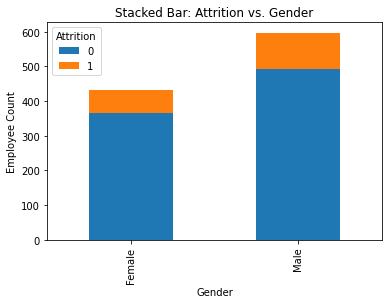

In [19]:
# Draw a stacked bar chart between Attrition and Gender 
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
s = (df.pivot_table(
        index='Gender', columns='Attrition', values='EmployeeCount', aggfunc='sum'))

s.plot(kind='bar', stacked=True).set_title("Stacked Bar: Attrition vs. Gender")
plt.ylabel('Employee Count')
plt.show()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

Text(0.5, 0, 'Years')

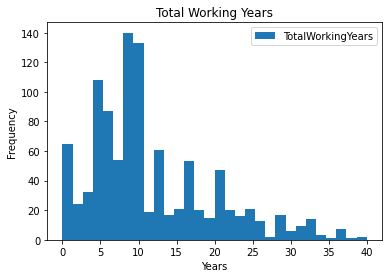

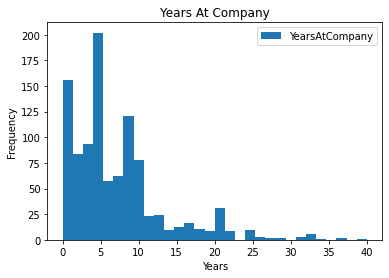

In [20]:
# Draw a histogram of TotalWorkingYears with 30 bins
TWY= pd.DataFrame(df['TotalWorkingYears'])
TWY_hist = TWY.plot.hist(bins=30).set_title("Total Working Years")
plt.xlabel('Years')
# Draw a histogram of YearsAtCompany
YAC= pd.DataFrame(df['YearsAtCompany'])
YAC_hist = YAC.plot.hist(bins=30).set_title("Years At Company")
plt.xlabel('Years')

In [21]:
from scipy.stats import skew 
import numpy as np  
import pylab as p 
# find whether the values in YearsAtCompany are skewed 
print( '\nSkewness for YearsAtCompany : ', skew(YAC)) 


Skewness for YearsAtCompany :  [1.76990516]


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


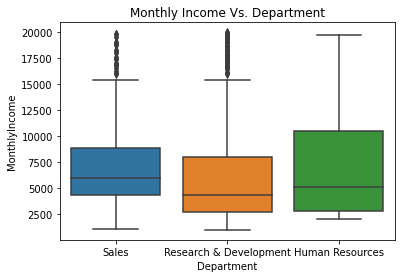

In [22]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
x = sns.boxplot(x="Department", y="MonthlyIncome", data=df).set_title("Monthly Income Vs. Department")

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


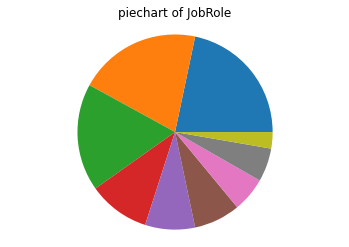

In [24]:
# Create a piechart of JobRole 

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
JR_1= df['JobRole'].value_counts().index[0:]
JR_2= df['JobRole'].value_counts()[0:]
JR_2
labels = ['Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Research Director', 'Sales Representative', 'Human Resources']
new_df = pd.DataFrame(data=JR_2, columns=['JobRole'])
new_df_1= np.array(new_df)
new_df_1
sizes = [223, 209, 183, 105,  85,  79,  59,  57,  28]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('piechart of JobRole')
plt.axis('equal')
plt.show()
